# Generate example data

Here we generate N examples of (x,y) pairs for some linear or non-linear function.

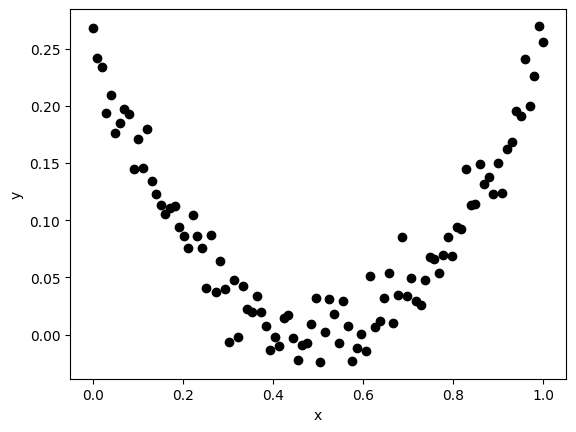

In [1]:
import numpy as np

def f(x, kind="non-linear"):
    if kind == "linear": 
        y = 2*x + 1 + 0.1 * np.random.randn(len(x),1)
    elif kind=="non-linear":
        y = (x-0.5)**2 + 0.02*np.random.randn(len(x),1)
    else:
        raise Exception("I don't know what you want from me!")
    return y

# Generate the data
N = 100
x = np.linspace(0,1,N).reshape(-1,1)
y = f(x, kind="non-linear")
x_ood = np.linspace(-0.5,1.5,N).reshape(-1,1)  # out of training distribution data


# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x,y, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# PyTorch needs Torch Tensors, not NumPy arrays as inputs
import torch
X = torch.FloatTensor(x)
Y = torch.FloatTensor(y)
X_OOD = torch.FloatTensor(x_ood)

# Building and training a MLP with PyTorch

Training starts ...
epoch=0 --> loss=0.1233


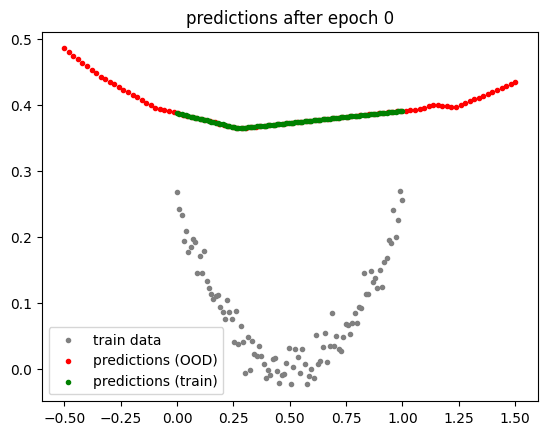

epoch=50 --> loss=0.0049


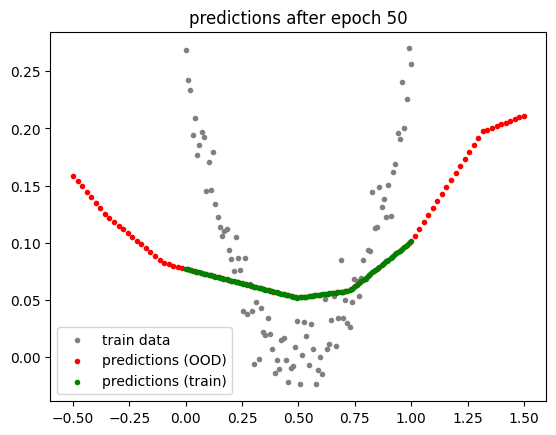

epoch=100 --> loss=0.0031


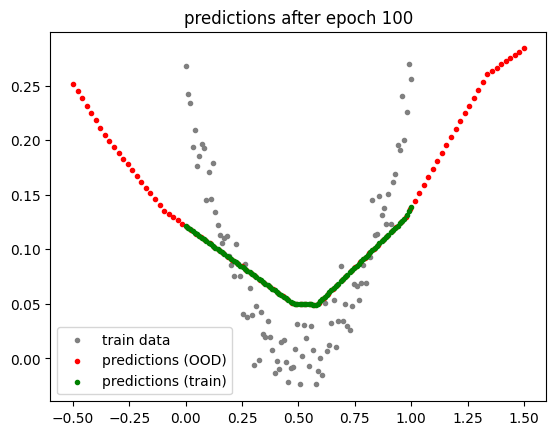

epoch=150 --> loss=0.0016


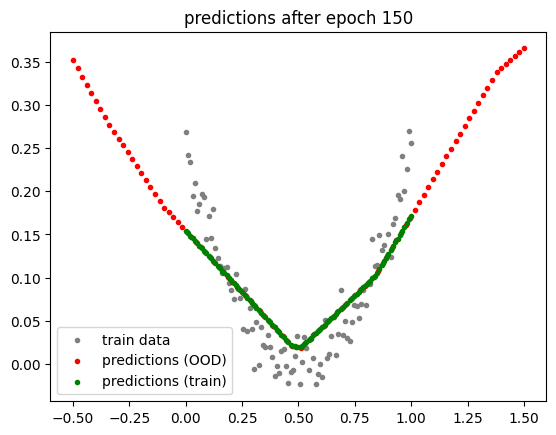

epoch=200 --> loss=0.0008


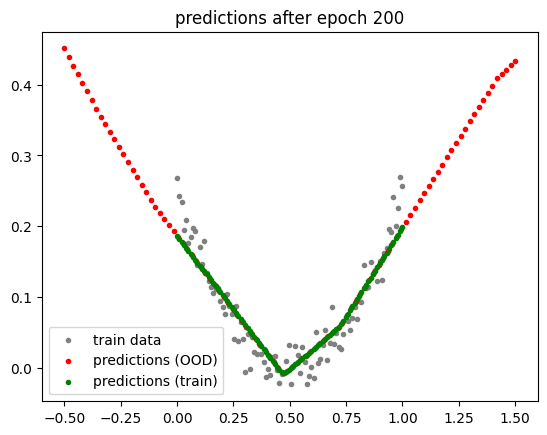

epoch=250 --> loss=0.0006


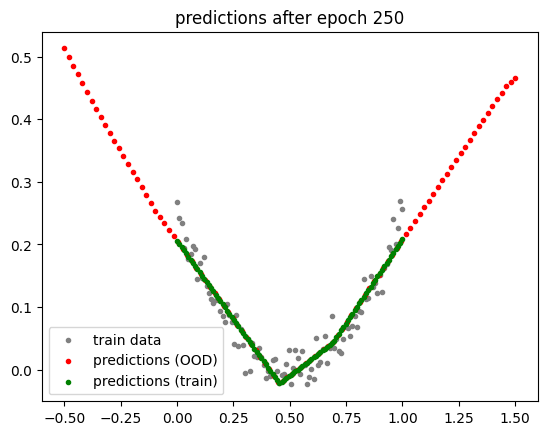

epoch=300 --> loss=0.0005


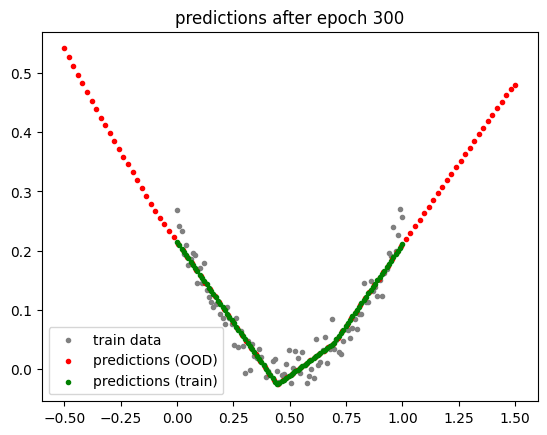

epoch=350 --> loss=0.0005


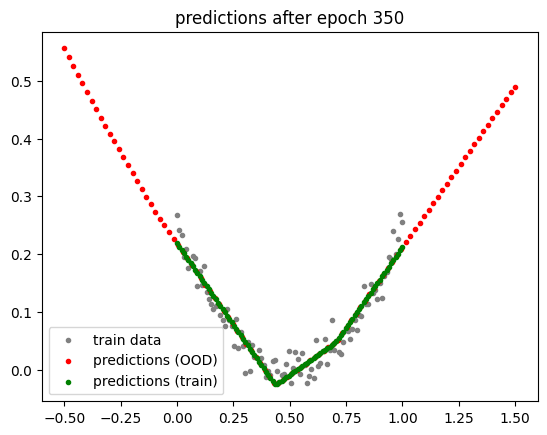

Training finished!


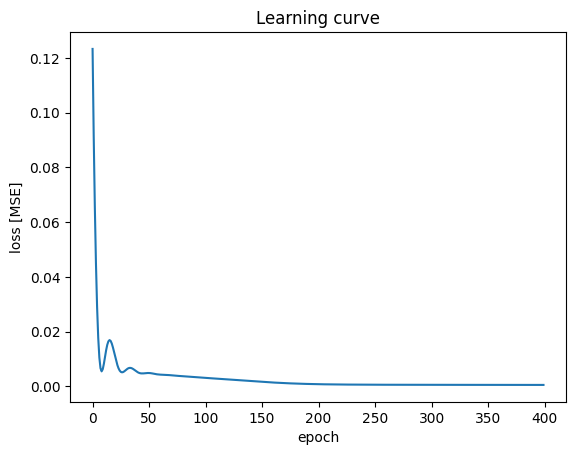

In [3]:
import torch.nn as nn
import torch.optim as optim

class SimpleMLPRegressor(nn.Module):

    def __init__(self, nr_hidden_neurons):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, nr_hidden_neurons),
            nn.ReLU(),
            nn.Linear(nr_hidden_neurons,1)
        )

    def forward(self, x):
        return self.layers(x)

# Try out: different nr of hidden neurons
model = SimpleMLPRegressor(nr_hidden_neurons=10)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

print("Training starts ...")
losses = []
for epoch in range(400):

    model.train()

    # Forward-Step
    pred = model(X)
    loss = loss_fn(pred, Y)

    # Backward-Step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append( loss.item() )

    if epoch % 50 == 0:
        print(f"{epoch=} --> loss={loss.item():.4f}")

        model.eval()
        with torch.no_grad():
            pred_train = model(X)
            pred_OOD = model(X_OOD)
        plt.scatter(x,y,              label="train data", marker=".", color="gray")
        plt.scatter(x_ood,pred_OOD,   label="predictions (OOD)",   marker=".", color="red")
        plt.scatter(x,pred_train,     label="predictions (train)", marker=".", color="green")
        plt.legend()
        plt.title(f"predictions after epoch {epoch}")
        plt.show()

print("Training finished!")

import matplotlib.pyplot as plt
plt.plot( losses )
plt.title("Learning curve")
plt.xlabel("epoch")
plt.ylabel("loss [MSE]")
plt.show()